In [ ]:
from rdkit import Chem
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv

def process_batch(batch):
    atom_counts = []
    atom_types = []
    for line in batch:
        mol = None
        try:
            mol = Chem.MolFromSmiles(line[0])  # The SMILES string is the first element
            if mol is not None:
                atom_counts.append(mol.GetNumAtoms())
                atom_types.extend([atom.GetSymbol() for atom in mol.GetAtoms()])
        except Exception as e:
            print(f"Error parsing SMILES: {line[0]} - Error: {e}")
        finally:
            del mol  # Explicitly delete the molecule object
    return atom_counts, atom_types

# Read the SMILES data from the CSV file
smiles_data = []
with open("MOSES.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    smiles_data = [row for row in reader]

# Define batch size
batch_size = 10000  # Adjust based on your system's memory capacity

# Initialize lists to store results
total_atom_counts = []
total_atom_types = []

# Process in batches with tqdm progress bar
for i in tqdm(range(0, len(smiles_data), batch_size), desc="Processing batches"):
    batch = smiles_data[i:i + batch_size]
    atom_counts, atom_types = process_batch(batch)
    total_atom_counts.extend(atom_counts)
    total_atom_types.extend(atom_types)

# Create the plots
# Plot for atom counts
plt.figure(figsize=(10, 6))
plt.hist(total_atom_counts, bins=range(min(total_atom_counts), max(total_atom_counts) + 1, 1), alpha=0.7, color='blue')
plt.title('Distribution of Atom Counts')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')
plt.show()


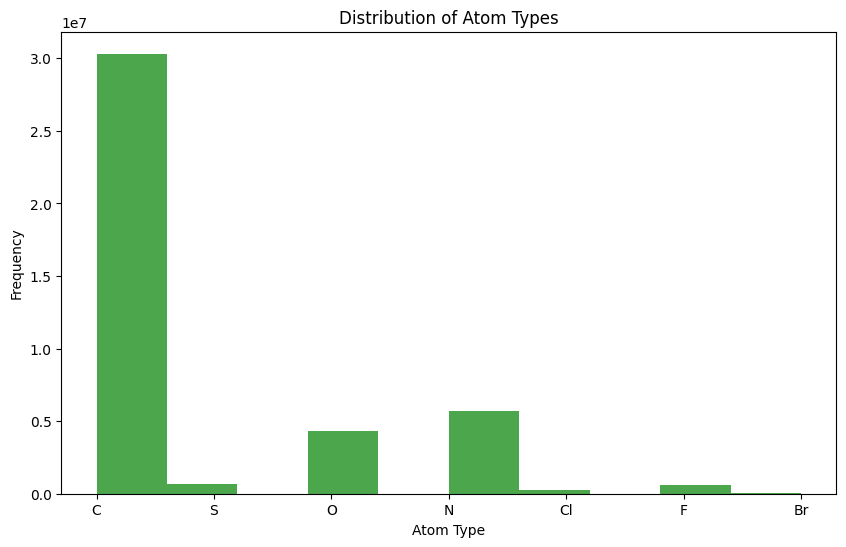

In [2]:

# Plot for atom types
plt.figure(figsize=(10, 6))
plt.hist(total_atom_types, alpha=0.7, color='green')
plt.title('Distribution of Atom Types')
plt.xlabel('Atom Type')
plt.ylabel('Frequency')
plt.show()


In [3]:
max(total_atom_counts)

27